# Prepare exercises

In [25]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

# General use imports
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modules and data
import requests
import acquire
from datetime import datetime

## *I. Working to create a prepare file*

### *Getting to know the data*

In [2]:
# Acquiring the necessary file

sales = acquire.get_local_sales()
sales.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
# General info

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ MB


In [4]:
sales.shape

(913000, 14)

In [6]:
a = sales.columns.tolist()
print(a,)

['item_id', 'sale_amount', 'sale_date', 'sale_id', 'store_id', 'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address', 'store_city', 'store_state', 'store_zipcode']


### *1. Convert date column to datetime format*

In [7]:
# Displaying the content of sale_date column as well as length and data type

sales.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [8]:
# Setting sale_date to a datetime format
sales.sale_date = pd.to_datetime(sales.sale_date)

# Sort rows by the date and then set the index as that date
sales1 = sales.set_index('sale_date').sort_index()


In [9]:
sales1.index.dtype

datetime64[ns, UTC]

In [10]:
sales1.shape[0], sales1.sale_id.nunique()

(913000, 913000)

In [11]:
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217


### *2. Plot the distribution of sale_amount and item_price*

In [12]:
# Checking the number of unique categories inside sale_amount

sales1.sale_amount.nunique()

213

<AxesSubplot:>

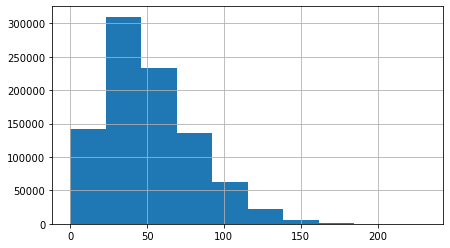

In [13]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales1.sale_amount.hist()

In [14]:
# Checking the number of unique categories inside item_price

sales1.item_price.nunique()

47

<AxesSubplot:>

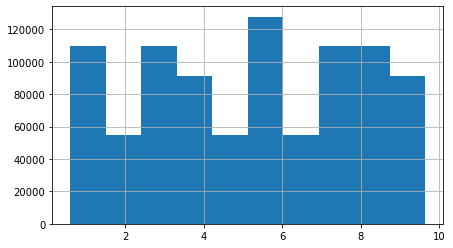

In [15]:
# Plotting sale_amount

plt.figure(figsize= (7, 4))
sales1.item_price.hist()

### *3. Set the index to be the datetime variable*

>**Already done in previous part**

### *4. Add a 'month' and 'day of week' column to your dataframe*

In [18]:
# Creating a month column

sales1['month']  = sales1.index.strftime('%m %b, %Y')
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,"01 Jan, 2013"
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013"


In [20]:
# Creating a weekday column

sales1.pop('weekday')
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,"01 Jan, 2013"
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013"


In [21]:
# Creating a day_of_week column

sales1['day_of_week'] = sales1.index.strftime('%a %b %d, %Y')
sales1.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,"01 Jan, 2013","Tue Jan 01, 2013"
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013","Tue Jan 01, 2013"


### *5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price*

In [26]:
# Creating a sales_total column

sales1['sales_total'] = sales1.sale_amount * sales1.item_price

In [27]:
sales1.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,"01 Jan, 2013","Tue Jan 01, 2013",10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013","Tue Jan 01, 2013",218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013","Tue Jan 01, 2013",125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,"01 Jan, 2013","Tue Jan 01, 2013",453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,"01 Jan, 2013","Tue Jan 01, 2013",294.00


### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*

In [51]:
# Writing t he function to prepare the sales dataset

def prep_sales_data(df):
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    df['month']  = df.index.strftime('%m %b, %Y')
    df['day_of_week'] = df.index.strftime('%a %b %d, %Y')
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [52]:
# Testing the function

df = prep_sales_data(sales)
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,"01 Jan, 2013","Tue Jan 01, 2013",10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013","Tue Jan 01, 2013",218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,"01 Jan, 2013","Tue Jan 01, 2013",125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,"01 Jan, 2013","Tue Jan 01, 2013",453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,"01 Jan, 2013","Tue Jan 01, 2013",294.00


****

## *II. Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following*

### *1. Convert date column to datetime format*

In [31]:
# Getting the data

opsd = acquire.get_opsd_germany()
opsd.head()

,Date,Consumption,Wind,Solar,Wind_and_Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [34]:
opsd.Date = pd.to_datetime(opsd.Date)

### *2. Plot the distribution of each of your variables*

>### Plotting the variables in the dataset using .plot

<AxesSubplot:ylabel='Frequency'>

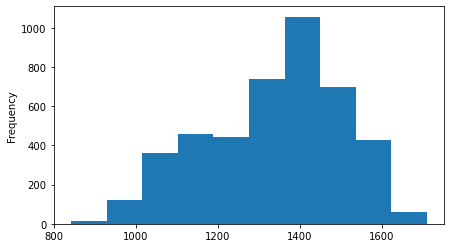

In [37]:
opsd.Consumption.plot(kind='hist', figsize=(7, 4))

<AxesSubplot:ylabel='Frequency'>

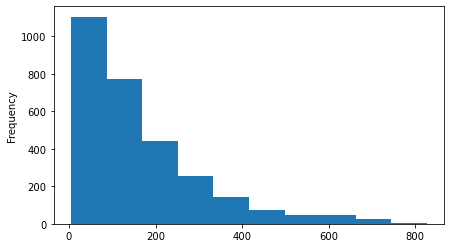

In [38]:
opsd.Wind.plot(kind='hist', figsize=(7, 4))

<AxesSubplot:ylabel='Frequency'>

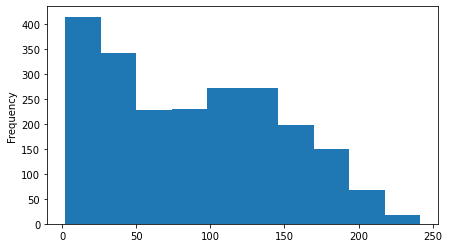

In [39]:
opsd.Solar.plot(kind='hist', figsize=(7, 4))

<AxesSubplot:ylabel='Frequency'>

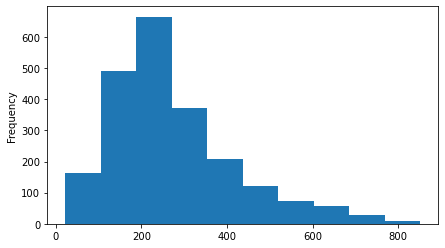

In [40]:
opsd.Wind_and_Solar.plot(kind='hist', figsize=(7, 4))

### *3. Set the index to be the datetime variable*

In [41]:
# Setting the Date column as index column

opsd = opsd.set_index('Date').sort_index()
opsd.head()

,Consumption,Wind,Solar,Wind_and_Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### *4. Add a month and a year column to your dataframe*

In [43]:
# Creating a month and a year column using the index column

opsd['month'] = opsd.index.strftime('%m-%b')
opsd['year'] = opsd.index.strftime('%Y')

In [44]:
opsd.head()

,Consumption,Wind,Solar,Wind_and_Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01-Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01-Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01-Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01-Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01-Jan,2006


### *5. Fill any missing values*

In [45]:
# Filling the nulls

opsd= opsd.replace(np.nan, 0)
opsd.head()

,Consumption,Wind,Solar,Wind_and_Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


In [48]:
# Checking the content of Wind_and_Solar to compare it to its next version
# when I perform the addition of Wind and Solar

opsd.Wind_and_Solar.unique()

array([  0.   , 234.052, 213.901, ..., 614.131, 728.714, 741.156])

In [49]:
# Rewriting the content of Wind_and_Solar by redoing the addition of Wind and Solar

opsd['Wind_and_Solar'] = opsd.Wind + opsd.Solar
opsd.Wind_and_Solar.unique()

# The two version are different meaning that filling the nulls changed the content of the Wind and Solar

array([  0.   ,  48.709,  24.628, ..., 614.131, 728.714, 741.156])

### *6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results*

In [50]:
# Function to prepare the opsd dataset

def prep_opsd_data(df):
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.strftime('%Y')
    df = df.replace(np.nan, 0)
    df['Wind_and_Solar'] = df.Wind + df.Solar
    return df